# Time Scaling Plots

In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
import os
import numpy as np
import pickle
import time
from matplotlib.ticker import AutoLocator, ScalarFormatter

2024-08-31 15:59:30.901901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Time Scaling Dictionary

In the file `utils_reboot/time_scaling_test_dei_new.pickle` we have a dictionary with the times for the Time Scaling plots present up to now in the paper. We have to add the times of `KernelSHAP`. In particular we have to add them in position `ts_dict['importances']['KernelSHAP']`.

In [3]:
basepath=os.path.dirname(os.getcwd())
ts_path=os.path.join(basepath,'utils_reboot','time_scaling_test_acq2.pickle')
ts_dict=open_element(ts_path)
ts_dict.keys()

dict_keys(['fit', 'predict', 'importances'])

In [8]:
ts_dict['importances']['KernelSHAP'].keys()

dict_keys(['Xaxis_100_6', 'Xaxis_250_6', 'Xaxis_500_6', 'Xaxis_1000_6', 'Xaxis_2500_6', 'Xaxis_5000_6', 'Xaxis_10000_6', 'Xaxis_25000_6', 'Xaxis_50000_6', 'Xaxis_100000_6'])

In [9]:
ts_dict['importances']['KernelSHAP']['Xaxis_100000_6']

[None]

`KernelSHAP Xaxis_100_6`

In [3]:
def get_shap_times(basepath,dataset_name):
    
    ts_shap_path=os.path.join(basepath,'experiments','results',
                              dataset_name,'experiments','time_scaling','EIF+',
                              'KernelSHAP')
    try:
        ts_shap_dict_path=get_most_recent_file(ts_shap_path)
    except FileNotFoundError:
        print('Dataset not found, KernelSHAP times not available')
        return None
    ts_shap_dict=open_element(ts_shap_dict_path)
    return ts_shap_dict['importances_time']

In [9]:
ts_dict['importances']['KernelSHAP']={}

In [7]:
shap100_time=get_shap_times(basepath,'Xaxis_100000_6')
ts_dict['importances']['KernelSHAP']['Xaxis_100000_6']={}
ts_dict['importances']['KernelSHAP']['Xaxis_100000_6']=[shap100_time]

Dataset not found, KernelSHAP times not available


In [10]:
time_scaling_datasets=['Xaxis_100_6','Xaxis_250_6','Xaxis_500_6','Xaxis_1000_6','Xaxis_2500_6','Xaxis_5000_6','Xaxis_10000_6','Xaxis_25000_6','Xaxis_50000_6']
for dataset in time_scaling_datasets:
    ts_dict['importances']['KernelSHAP'][dataset]={}
    shap_time=get_shap_times(basepath,dataset)
    ts_dict['importances']['KernelSHAP'][dataset]=[shap_time]

In [14]:
ts_dict['importances'].keys()

dict_keys(['EXIFFI+', 'EXIFFI', 'IF_EXIFFI', 'DIFFI', 'RandomForest', 'KernelSHAP'])

In [15]:
dataset_names_samples=['Xaxis_100_6','Xaxis_250_6','Xaxis_500_6',
              'Xaxis_1000_6','Xaxis_2500_6','Xaxis_5000_6',
              'Xaxis_10000_6','Xaxis_25000_6']
# interpretations=list(ts_dict['importances'].keys())
interpretations=['EXIFFI+','EXIFFI','DIFFI','RandomForest','KernelSHAP']
for interpretation in interpretations:
    print('#'*50)
    print(f'Interpretation: {interpretation}')
    print('#'*50)
    for dataset in dataset_names_samples:
        print(f'Importance time for {dataset} for {interpretation} is {ts_dict["importances"][interpretation][dataset][0]}')

##################################################
Interpretation: EXIFFI+
##################################################
Importance time for Xaxis_100_6 for EXIFFI+ is 0.07765626907348633
Importance time for Xaxis_250_6 for EXIFFI+ is 0.09388613700866699
Importance time for Xaxis_500_6 for EXIFFI+ is 0.12157320976257324
Importance time for Xaxis_1000_6 for EXIFFI+ is 0.18172955513000488
Importance time for Xaxis_2500_6 for EXIFFI+ is 0.34185123443603516
Importance time for Xaxis_5000_6 for EXIFFI+ is 0.6324136257171631
Importance time for Xaxis_10000_6 for EXIFFI+ is 1.3712124824523926
Importance time for Xaxis_25000_6 for EXIFFI+ is 4.929478168487549
##################################################
Interpretation: EXIFFI
##################################################
Importance time for Xaxis_100_6 for EXIFFI is 0.07401871681213379
Importance time for Xaxis_250_6 for EXIFFI is 0.09672188758850098
Importance time for Xaxis_500_6 for EXIFFI is 0.12714886665344238
Importance t

In [22]:
save_element(ts_dict,os.path.join(basepath,'utils_reboot'),'time_scaling_test_acq2',no_time=True)

In [23]:
shap_dict_path=os.path.join(basepath,'utils_reboot','time_scaling_test_acq2.pickle')
shap_dict=open_element(shap_dict_path)

In [30]:
shap_dict['importances']['KernelSHAP'].keys()

dict_keys(['Xaxis_100_6', 'Xaxis_250_6', 'Xaxis_500_6', 'Xaxis_1000_6', 'Xaxis_2500_6', 'Xaxis_5000_6', 'Xaxis_10000_6', 'Xaxis_25000_6', 'Xaxis_30000_6'])

In [31]:
xaxis_time=shap_dict['importances']['KernelSHAP']['Xaxis_1000_6'][0]
xaxis_time

48.98542928695679

In [32]:
shap_dict['importances']['KernelSHAP']['Xaxis']=[xaxis_time]

In [37]:
shap_dict['importances']['KernelSHAP']['Xaxis']

[48.98542928695679]

In [38]:
save_element(shap_dict,os.path.join(basepath,'utils_reboot'),'time_scaling_test_shap_new',no_time=True)

In [39]:
shap_dict_path=os.path.join(basepath,'utils_reboot','time_scaling_test_shap_new.pickle')
shap_dict_new=open_element(shap_dict_path)

In [40]:
shap_dict_new['importances']['KernelSHAP'].keys()

dict_keys(['Xaxis_100_6', 'Xaxis_250_6', 'Xaxis_500_6', 'Xaxis_1000_6', 'Xaxis_2500_6', 'Xaxis_5000_6', 'Xaxis_10000_6', 'Xaxis_25000_6', 'Xaxis_30000_6', 'Xaxis'])

### Check `time_scaling_test_acq2.pickle`

In [1]:
basepath=os.path.dirname(os.getcwd())
ts_dict_path=os.path.join(basepath,'utils_reboot','time_scaling_test_acq2.pickle')
ts_dict=open_element(ts_dict_path)

NameError: name 'os' is not defined

In [3]:
ts_dict['importances']['RandomForest'].keys()

dict_keys(['Xaxis_100_6', 'Xaxis_250_6', 'Xaxis_500_6', 'Xaxis_1000_6', 'Xaxis_2500_6', 'Xaxis_5000_6', 'Xaxis_10000_6', 'Xaxis_25000_6', 'Xaxis_50000_6', 'Xaxis_100000_6'])

In [25]:
ts_dict['importances']['RandomForest']['Xaxis_100_6'][:10]

[0.17921209335327148,
 0.1914043426513672,
 0.18743157386779785,
 0.19190549850463867,
 0.1819925308227539,
 0.18953442573547363,
 0.17743325233459473,
 0.18003559112548828,
 0.17818236351013184,
 0.17945384979248047]

### Check `time_scaling_test_acq2_feat.pickle`

In [2]:
basepath=os.path.dirname(os.getcwd())
ts_dict_path=os.path.join(basepath,'utils_reboot','time_scaling_test_acq2_feat.pickle')
ts_dict=open_element(ts_dict_path)

In [4]:
ts_dict['importances']['RandomForest'].keys()

dict_keys(['Xaxis_5000_16', 'Xaxis_5000_32', 'Xaxis_5000_64'])

In [9]:
ts_dict['importances']['EXIFFI']['Xaxis_5000_16'][:10]

[0.8726513385772705,
 0.9319798946380615,
 0.892378568649292,
 1.0265145301818848,
 0.8956305980682373,
 1.041060209274292,
 0.9184668064117432,
 1.0380446910858154,
 0.8971171379089355,
 0.9214136600494385]

## Utility Functions

In [19]:
def get_vals(basepath,
             model, 
             dataset_names,
             type='predict',
             dict_name='time_scaling_test_shap.pickle'):
    
    with open(basepath + "/utils_reboot/" + dict_name, "rb") as file:
        dict_time = pickle.load(file)

    val_times=[]
    for d_name in dataset_names:
        time=np.array(dict_time[type][model][d_name])
        val_times.append(time)

    median_val_times=[np.percentile(x,50) for x in val_times]
    five_val_times=[np.percentile(x,5) for x in val_times]
    ninefive_val_times=[np.percentile(x,95) for x in val_times]

    return median_val_times,five_val_times,ninefive_val_times

In [42]:
get_vals(basepath=basepath,
         model='KernelSHAP',
         dataset_names=['Xaxis'],
         type='importances',
         dict_name='time_scaling_test_shap_new.pickle')

([48.98542928695679], [48.98542928695679], [48.98542928695679])

In [40]:
for interpretation in interpretations:
    key_list=list(shap_dict['importances'][interpretation].keys())
    print('#'*50)
    print(f'Time scaling datasets for {interpretation} are:')
    print('#'*50)
    for key in key_list:
        if key.startswith('Xaxis_'):
            print(key)

##################################################
Time scaling datasets for EXIFFI+ are:
##################################################
Xaxis_100_6
Xaxis_250_6
Xaxis_500_6
Xaxis_2500_6
Xaxis_5000_6
Xaxis_10000_6
Xaxis_25000_6
Xaxis_50000_6
Xaxis_100000_6
Xaxis_250000_6
Xaxis_1000_6
Xaxis_1000_8
Xaxis_1000_10
Xaxis_1000_12
Xaxis_5000_16
Xaxis_5000_32
Xaxis_5000_128
Xaxis_5000_256
Xaxis_5000_512
Xaxis_5000_64
##################################################
Time scaling datasets for EXIFFI are:
##################################################
Xaxis_100_6
Xaxis_250_6
Xaxis_500_6
Xaxis_2500_6
Xaxis_5000_6
Xaxis_10000_6
Xaxis_25000_6
Xaxis_50000_6
Xaxis_100000_6
Xaxis_1000_6
Xaxis_1000_8
Xaxis_1000_10
Xaxis_1000_12
Xaxis_5000_16
Xaxis_5000_32
Xaxis_5000_256
Xaxis_5000_128
Xaxis_5000_64
Xaxis_5000_512
##################################################
Time scaling datasets for DIFFI are:
##################################################
Xaxis_100_6
Xaxis_250_6
Xaxis_500_6
Xaxis_250

In [29]:
get_vals(basepath=basepath,model='RandomForest',dataset_names=['Xaxis_100000_6'],type='importances')

([111.20538210868835], [106.85904347896576], [119.73643380403519])

In [3]:
model_names=['sklearn_IF','EIF','EIF+','DIF','AnomalyAutoencoder']
importance_names=['EXIFFI+','EXIFFI','DIFFI','RandomForest']
dataset_names_samples=['Xaxis_100_6','Xaxis_250_6','Xaxis_500_6',
              'Xaxis','Xaxis_2500_6','Xaxis_5000_6',
              'Xaxis_10000_6','Xaxis_25000_6','Xaxis_50000_6','Xaxis_100000_6']
dataset_names_features=['Xaxis_5000_16','Xaxis_5000_32','Xaxis_5000_64',
               'Xaxis_5000_128','Xaxis_5000_256','Xaxis_5000_512']
os.chdir("../")
data_path_samples=os.getcwd()+"/data/syn/"
data_path_features=os.getcwd()+"/data/syn/syn_feat/"
plot_path_samples = os.getcwd()+"/experiments/results/time_scaling_plots/samples"
plot_path_features = os.getcwd()+"/experiments/results/time_scaling_plots/features"

In [16]:
def plot_time_scaling(basepath,
                      model_names,
                      dataset_names,
                      data_path,
                      type='predict',
                      plot_type='samples',
                      plot_path=os.getcwd(),
                      show_plot=True,
                      save_plot=True,
                      dict_name:str='time_scaling_test_shap.pickle'):

    assert type in ['predict','fit','importances'], "Type not valid. Accepted values: ['predict','fit','importances'] "
    assert plot_type in ['samples','features'], "Plot Type not valid. Accepted values: ['samples','features']"
    
    datasets=[Dataset(name,path=data_path) for name in dataset_names]

    if plot_type == "samples":
        sample_sizes=[data.shape[0] for data in datasets]
    elif plot_type == "features":
        sample_sizes=[data.shape[1] for data in datasets]

    fig, ax = plt.subplots()
    plt.style.use('default')
    plt.rcParams['axes.facecolor'] = '#F2F2F2'
    plt.grid(alpha = 0.7)
    colors = ["tab:red","tab:blue","tab:orange","tab:green","tab:purple"]

    maxs=[]
    mins=[]
    for i,model in enumerate(model_names):
        median_times,five_times,ninefive_times=get_vals(basepath=basepath,
                                                        model=model,
                                                        dataset_names=dataset_names,
                                                        type=type,
                                                        dict_name=dict_name)
        maxs.append(np.max(median_times))
        mins.append(np.min(median_times))

        if model == 'sklearn_IF':
            ax.plot(sample_sizes,median_times,alpha=0.85,c=colors[i],marker="o",label='IF')
        else:
            ax.plot(sample_sizes,median_times,alpha=0.85,c=colors[i],marker="o",label=model)
        
        ax.fill_between(sample_sizes,five_times,ninefive_times,alpha=0.1,color=colors[i])
    
    if plot_type == "samples":
        ax.set_yscale('log')
        ax.set_xscale("log")
        ax.yaxis.set_major_locator(AutoLocator())
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.minorticks_off()
        ax.set_xticks(sample_sizes,sample_sizes,rotation=45)
        ax.tick_params(axis='x',which='minor',labelsize=12)
        ax.set_yticks([1,10,25,100,250])
        ax.tick_params(axis='y',which='minor',labelsize=14)
    else:
        ax.set_xscale("log",base=2)
        ax.yaxis.set_major_locator(AutoLocator())
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.minorticks_off()
        ax.set_xticks(sample_sizes,sample_sizes,rotation=45)
        ax.tick_params(axis='x',which='minor',labelsize=12)
        if type=='predict':
            ax.set_yticks([0.02,0.5,1,2,5,10])
        elif type=='fit':
            ax.set_yticks([0.06,3,8,15,30])
        elif type=='importances':
            ax.set_yticks([0.35,10,20,40,50,75,150,280])
        ax.tick_params(axis='y',which='minor',labelsize=14)

    if plot_type == "samples":
        ax.set_xlabel('Sample Size',fontsize = 20)
    elif plot_type == "features":
        ax.set_xlabel('N. Features',fontsize = 20)
    ax.set_ylabel(f'{type} Time (s)',fontsize = 20)
    #plt.ylim(np.min(mins)-0.2*np.min(mins),np.max(maxs)+0.2*np.max(maxs))

    ax.legend()
    ax.grid(visible=True, alpha=0.5, which='major', color='gray', linestyle='-')
    
    t = time.localtime()
    current_time = time.strftime("%d-%m-%Y_%H-%M-%S", t)

    if save_plot:
        plt.savefig(f'{plot_path}/{current_time}_time_scaling_plot_{plot_type}_{type}.pdf',bbox_inches='tight')

    if show_plot:
        plt.show()
    
    return fig,ax


## Try Time Scaling Plot with `KernelSHAP`


In [25]:
importance_names=['EXIFFI+','EXIFFI','DIFFI','RandomForest','KernelSHAP']
dataset_names_samples=['Xaxis_100_6','Xaxis_250_6','Xaxis_500_6',
              'Xaxis_1000_6','Xaxis_2500_6','Xaxis_5000_6',
              'Xaxis_10000_6','Xaxis_25000_6','Xaxis_50000_6']
data_path_samples=os.path.join(basepath,'data','syn')
plot_path_samples=os.path.join(basepath,'experiments','results','time_scaling_plots','samples')

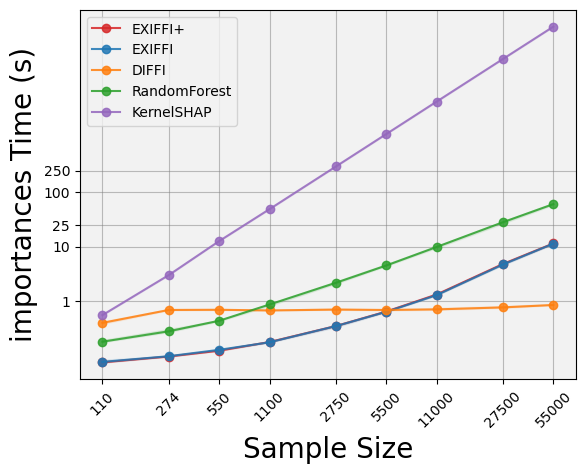

In [26]:
fig,ax=plot_time_scaling(basepath=basepath,
                         model_names=importance_names,
                         dataset_names=dataset_names_samples,
                         data_path=data_path_samples,
                         plot_path=plot_path_samples,
                         type="importances",
                         plot_type="samples",
                         show_plot=True,
                         save_plot=False,
                         dict_name='time_scaling_test_acq2.pickle')

## Samples Plots

### Predict Plot

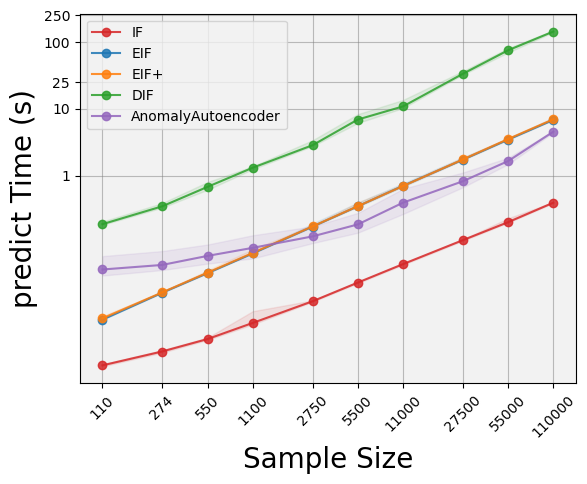

In [18]:
fig,ax=plot_time_scaling(model_names,
                         dataset_names_samples,
                         data_path_samples,
                         plot_path=plot_path_samples,
                         type="predict",
                         plot_type="samples",
                         save_plot=True)

### Fit Plot

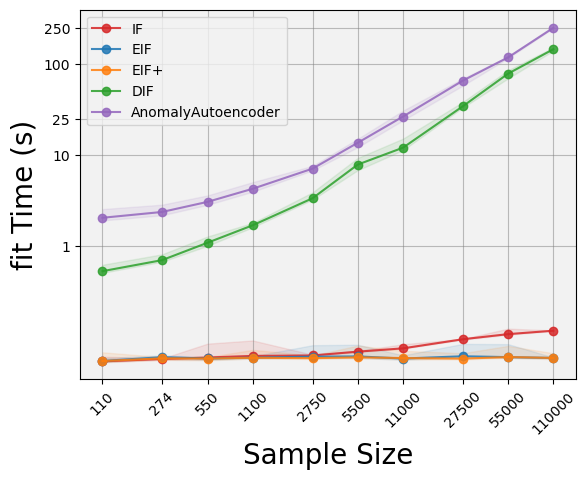

In [19]:
fig,ax=plot_time_scaling(model_names,dataset_names_samples,data_path_samples,plot_path=plot_path_samples,type="fit",plot_type="samples")

### Importance Plots

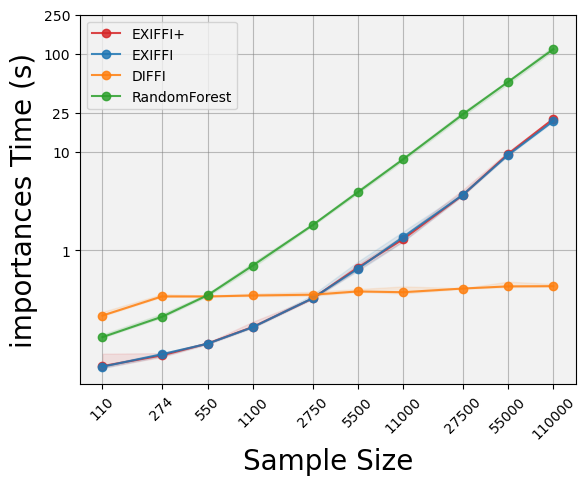

In [20]:
fig,ax=plot_time_scaling(importance_names,dataset_names_samples,data_path_samples,plot_path=plot_path_samples,type="importances",plot_type="samples")

## Features Plots

### Predict Plot

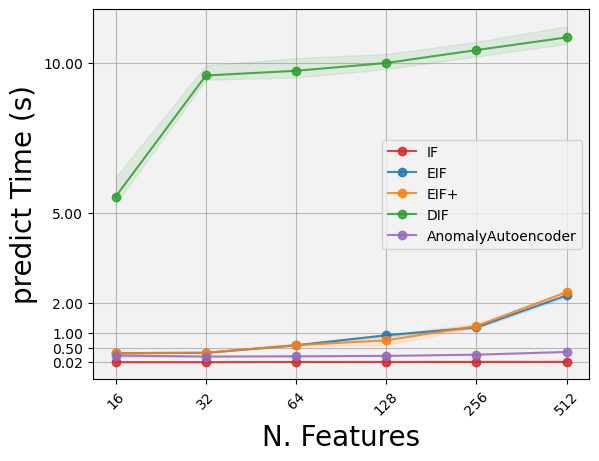

In [21]:
fig,ax=plot_time_scaling(model_names,dataset_names_features,data_path_features,plot_path=plot_path_features,type="predict",plot_type="features",save_plot=True)

### Fit Plot

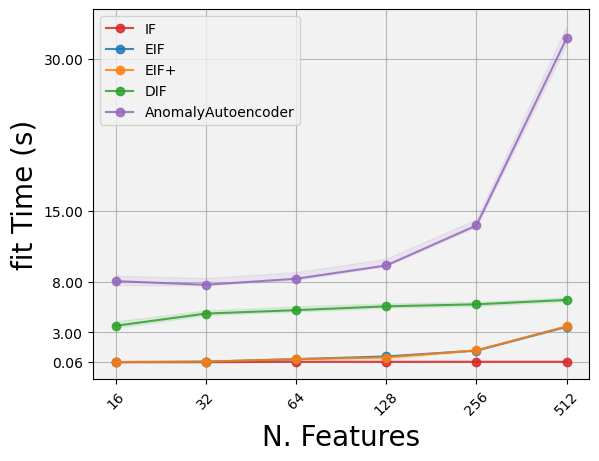

In [22]:
fig,ax=plot_time_scaling(model_names,dataset_names_features,data_path_features,plot_path=plot_path_features,type="fit",plot_type="features",save_plot=True)

### Importances Plot

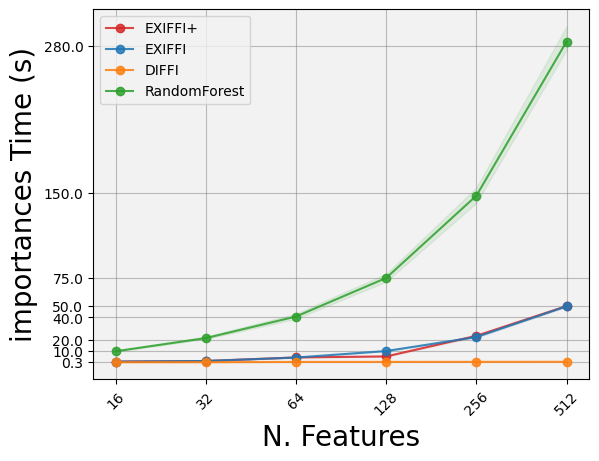

In [9]:
fig,ax=plot_time_scaling(importance_names,dataset_names_features,data_path_features,plot_path=plot_path_features,type="importances",plot_type="features",save_plot=True)

## Metrics time dict

In [2]:
basepath=os.path.dirname(os.getcwd())
metric_path=os.path.join(basepath,'utils_reboot','new_time_scenario.pickle')
metric_dict=open_element(metric_path)
metric_dict.keys()

dict_keys([1, 2])

In [3]:
metric_dict[1]['fit']['ECOD']['wine']

[0.1396033763885498]

In [18]:
metric_dict[1]['fit']['IF']['wine']

[3.7367656230926514]

In [6]:
met_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/wine/experiments/metrics/ECOD/scenario_2'
met_dict_path=get_most_recent_file(met_path,filename='perf_wine_ECOD_2')
met_dict=open_element(met_dict_path)

In [8]:
path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/Yaxis/experiments/contamination/EIF'
os.listdir(path)
# prec_path=get_most_recent_file(path)

['08-03-2024_13-46-16_.pickle', '25-03-2024_09-51-31_.pickle', 'scenario_2']

In [9]:
path=os.path.join(path,'scenario_2')
os.listdir(path)

['04-03-2024_14-31-27_.pickle']